### <font color='grey' style='font-family:Georgia'>_Data Love Letter_</font>
# <font color='green' style='font-family:Georgia'>BioTIME Database</font>


> To: _DSE_<br> From: _Giulia Zarpellon_<br> Date: _April 2023_

Full citation for the data we are exploring:

> Dornelas M, Antão LH, Moyes F, Bates, AE, Magurran, AE, et al. BioTIME: A database of biodiversity time series for the Anthropocene. Global Ecol Biogeogr. 2018; 27:760 - 786. https://doi.org/10.1111/geb.12729

## <font color='grey' style='font-family:Georgia'>Preliminary</font>

### 1. Why did you choose to explore this dataset among many others?

- [BioTIME](https://biotime.st-andrews.ac.uk/) is a _"global database of assemblage time series for quantifying and understanding biodiversity change"_. Indeed, it claims to be _"the largest compilation of biodiversity time series containing raw data on species identities and abundances from ecological assemblages"_ ([see here](https://biotime.st-andrews.ac.uk/downloads/interactBioTIME.html#using-the-mysql-database)).
- Unlike the [LPI database](https://www.livingplanetindex.org/), this one does not seem to be linked to a particular indicator/index. The database seems to be cited by the community, but I'm not sure of _how_ it's actually been used by scientists (and maybe policy-makers?). The intention behind this exploration is to uncover some of the opportunities this data offers. Because we just explored the LPI data, and both should technically be compilations of "abundance" data<sup>(*)</sup>, we might be able to offer some comparison as well.

<sup>(*)</sup> _This we should check, though!_

### 2. Where did you find this data?

- BioTIME is proudly open-access and free to anyone anywhere (🎉 yay!). [Data usage guidelines](https://biotime.st-andrews.ac.uk/usageGuidelines.php) require respecting the licenses associated to the datasets for each study included in the database, which can vary across the database but should generally be on the open side (Creative Commons and Open Licences, as discussed [here](https://biotime.st-andrews.ac.uk/usageGuidelines.php)). If using particular studies from this data, we should consult their individual licenses carefully. For BioTIME itself, licence should be CC-BY-4.0 (see details [here](https://creativecommons.org/licenses/by/4.0/legalcode)).
- Data can be access through a custom search or in its entirety via the BioTIME [download page](https://biotime.st-andrews.ac.uk/download.php). The dataset is also [hosted in Zenodo](https://zenodo.org/record/5026943#.ZC8o7ezMLdp). Additional files in `.csv` and `.xlsx` contain metadata and citation information. Two main formats are available for the data: 
    1. **Full database SQL zip file** (1.01 GB unzipped). This `.sql` file is meant to be loaded into a MySQL database. 
    2. **Raw data in `.csv` zip file** (1.22 GB unzipped), a table that should summarize the database (see more on this and the database structure below). 

### 3. Who is behind the data?

- As mentioned under "Funding"
> BioTIME is hosted and based at the University of St Andrews. It grew out of two ERC grants (AdG BioTIME 250189 and PoC BioCHANGE 72744) awarded to Professor Anne Magurran. 
- Their [Team webpage](https://biotime.st-andrews.ac.uk/biotimeTeam.php) currently features an all-female core team (!) and explains  the composition of the BioTIME consortium:
> The wider BioTIME consortium comprises many of the data contributors to the database along with enthusiastic University of St Andrews students and staff who assisted with data collection and cleaning. There are 265 BioTIME consortium members based at institutions spanning 35 countries around the globe. 
- While I cannot seem to find a list of Consortium associates, the database contains a `contacts` table with details of who is behind each study, which I believe should correspond to folks who actually contributed data. Data contributors where invited to be co-authors of the [BioTIME data paper](https://onlinelibrary.wiley.com/doi/full/10.1111/geb.12729). There seems to be a positive emphasis on giving credit to data collectors, which reflects on the data use agreement. 
- Submission of contributions is managed via a quite extensive `xlsx` form (link available [here](https://biotime.st-andrews.ac.uk/contribute.php)). In the database, there's also a `curation` table which provide space for further annotations, e.g., the date of when the study was added to the database -- a thing we could not know in the LPI data. Similarly to the LPI data, though, at first glance it looks like the data is sourced from scientific literature only.

### 4. Is the dataset static or living?

- The database should be continuously updated with new entries, and I'll check below on the `curation.DATE_STUDY_ADDED` field to understand how often this happens. In contrast to the LPI data, there are no "official releases" or versions, but additions should be easily tracked using the `curation` table. We have no way of telling whether data is ever removed once contributed. 
- The version used here was downloaded in April 2023, but the filenames are marked with the date `24_06_2021`.

## <font color='grey' style='font-family:Georgia'>First impressions</font>

### 5. What does the data look like?

- The database structure is well documented and BioTIME offers some [examples for data interaction](https://biotime.st-andrews.ac.uk/downloads/interactBioTIME.html#using-the-mysql-database) using R. The same webpage contains an infographic mapping the database structure, which we report below. 
- There are **11 tables** in the database. Metadata description and data types are provided [here](https://biotime.st-andrews.ac.uk/downloads/bioTIMETables_09_02_2017.pdf), and might be a bit outdated (2017 from the filename), not including the `citation1` table. Note that the `BioTIMEMetadata_24_06_2021.csv` contains actual info from tables, and not just metadata description. 
- Instead of spinning a MySQL server, we repackaged the BioTIME database into a SQLite database, which does not require a server (a more secure option). This repackaging allows us to interact with the data directly in Python (using `sqlite3` and `pandas`), without additional installations. The process to repackage the data is documented in **#TODO add link/name here**.

<center>
    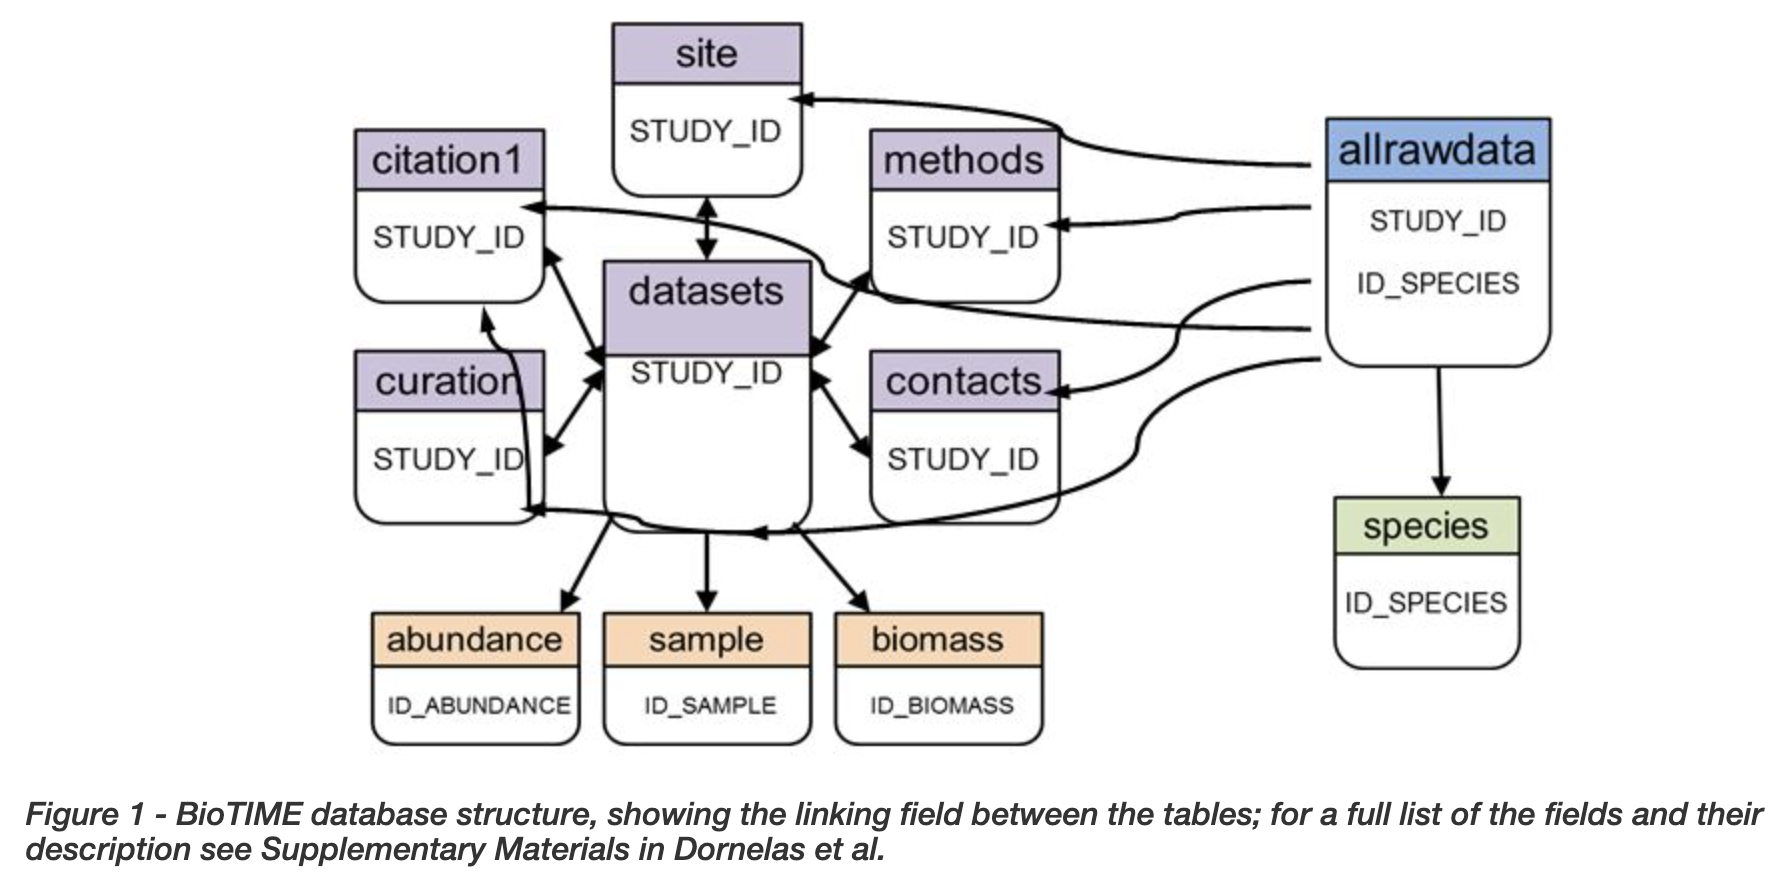<br>
</center>

Figure from [https://biotime.st-andrews.ac.uk/downloads/interactBioTIME.html](https://biotime.st-andrews.ac.uk/downloads/interactBioTIME.html).

- The provided `csv` file of raw data is obtained from [the following query](https://biotime.st-andrews.ac.uk/downloads/interactBioTIME.html) (which apparently _"can take several hours to run"_):
```
fullQuery<-dbGetQuery(myConnection, "SELECT allrawdata.STUDY_ID, allrawdata.DAY, allrawdata.MONTH, allrawdata.YEAR, allrawdata.SAMPLE_DESC, allrawdata.PLOT, allrawdata.ID_SPECIES, allrawdata.LATITUDE,
allrawdata.LONGITUDE, sum(allrawdata.ABUNDANCE), sum(allrawdata.BIOMASS), species.GENUS, species.SPECIES, species.GENUS_SPECIES from allrawdata inner join site on allrawdata.STUDY_ID=site.STUDY_ID inner join
species on allrawdata.ID_SPECIES=species.ID_SPECIES group by concat(allrawdata.STUDY_ID, allrawdata.DAY, allrawdata.MONTH, allrawdata.YEAR, allrawdata.SAMPLE_DESC, allrawdata.ID_SPECIES, allrawdata.LATITUDE,
allrawdata.LONGITUDE)")
```


In [1]:
from collections import Counter
import datetime
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import plotly.express as px
import seaborn as sns
import sqlite3

In [2]:
# load the csv data into DataFrames
# we need to change the default encoding for citations and metadata: in cp437 all characters should be defined
query_csv = pd.read_csv(open('data/BioTIMEQuery_24_06_2021.csv', 'rb'), index_col=0)
citations_csv = pd.read_csv(open('data/BioTIMECitations_24_06_2021.csv', 'rb'), encoding='cp437')
metadata_csv = pd.read_csv(open('data/BioTIMEMetadata_24_06_2021.csv', 'rb'), encoding='cp437')

print(f"Query csv shape: {query_csv.shape}")
print(f"Citations csv shape: {citations_csv.shape}")
print(f"Metadata csv shape: {metadata_csv.shape}")

print(f"\nColumns for query_csv:\n{list(query_csv.columns)}")

<ipython-input-2-dbb5832539ae>:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  query_csv = pd.read_csv(open('data/BioTIMEQuery_24_06_2021.csv', 'rb'), index_col=0)


Query csv shape: (8552249, 14)
Citations csv shape: (610, 2)
Metadata csv shape: (381, 42)

Columns for query_csv:
['STUDY_ID', 'DAY', 'MONTH', 'YEAR', 'SAMPLE_DESC', 'PLOT', 'ID_SPECIES', 'LATITUDE', 'LONGITUDE', 'sum.allrawdata.ABUNDANCE', 'sum.allrawdata.BIOMASS', 'GENUS', 'SPECIES', 'GENUS_SPECIES']


- `BioTIMEMetadata_24_06_2021.csv` columns account for almost all the fields of the database tables, except for `allrawdata` which has its dedicated `csv` from a different query. Excluded fields are: 
    - `datasets.AB_TYPE`, `datasets.BIO_TYPE`, `datasets.SAMPLE_TYPE` 
    - `site.CEN_LATITUDE`, `site.CEN_LONGITUDE`, `site.AREA`
    - `species.GENUS`, `species.SPECIES`, `species.GENUS_SPECIES`
    - `citation1.CITATION_LINE` (might correspond to TITLE) and `citation1.EN`

In [3]:
# load all the db tables separately
table_names = ['abundance', 'allrawdata', 'biomass', 'citation1', 'contacts', 'curation', 
               'datasets', 'methods', 'sample', 'site', 'species']
dfs = dict.fromkeys(table_names)

conn = sqlite3.connect("data/biotime.db")
for table in table_names:
    query = f"SELECT * FROM {table};"
    dfs[table] = pd.read_sql_query(query, conn)

In [4]:
dfs['allrawdata'].shape

(8771034, 13)

In [5]:
study_ids = dfs['allrawdata']['STUDY_ID'].unique()
differences = {}
for i in study_ids:
    if dfs['allrawdata']['STUDY_ID'].value_counts()[i] != query_csv['STUDY_ID'].value_counts()[i]:
        differences[i] = dfs['allrawdata']['STUDY_ID'].value_counts()[i] - query_csv['STUDY_ID'].value_counts()[i]

In [6]:
sum(differences.values())

218785

- There are 381 unique studies.
- There's a difference of 218,785 records between the `allrawdata` table and `csv`, which might be due to inner joins (with `site`, `species`) or because of grouping. 

*Maybe this needs more digging -- I'm not sure the difference is clear to me.* 

### 6. What is the data coverage and resolution 

- Coverage for this database can be explored along different axes. Here we briefly look at the **geographic, taxonomic and temporal** components of the data.

**Geographic distribution**
- Throughout the database's tables there are several mentions of geolocations:
    - The `allrawdata` table contains actual (lat, lon) of the records's location, and a plot identifier
    - The `datasets` table records whether a study has a fixed plot, and the central latitude and longitude for the study (using a convex hull of records' locations, I believe). It also specifies the total number of geographic points included in each study.
    - The `site` table describes study sites in more detail: there are columns to identify the site's habitat, biome, climate and realm, as well as the extent of the area site in km<sup>2</sup>. Other two columns report central latitude and longitude, and interestingly there's a boolean flag for `PROTECTED_AREA`.
- Below, we plot the studies central locations, coloured by taxa and sized by the total number of records they include (all from the `datasets` table).

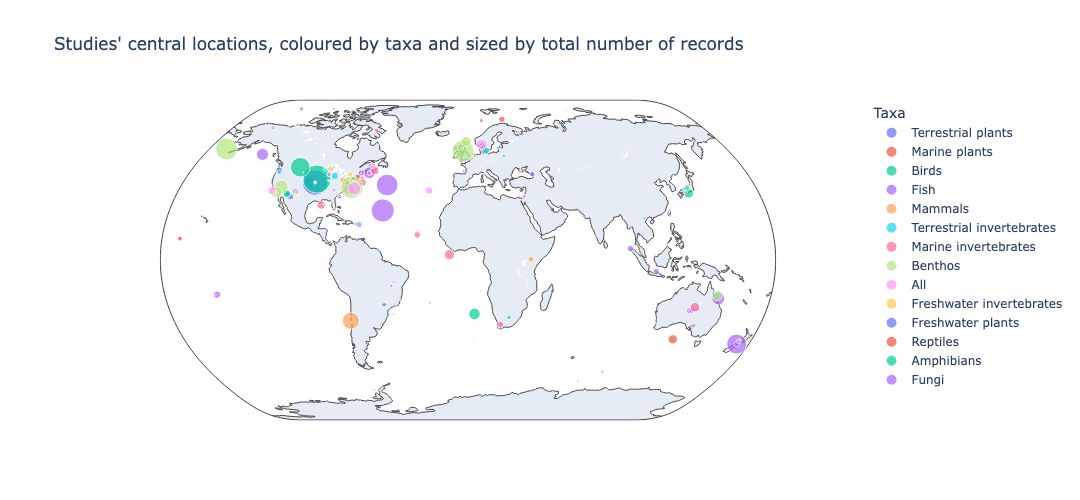

In [7]:
fig = px.scatter_geo(dfs['datasets'], lat="CENT_LAT", lon="CENT_LONG",
                     color="TAXA",
                     size="TOTAL",
                     hover_name="ORGANISMS",
                     hover_data=[],
                     projection="natural earth", 
                     title=f"Studies' central locations, coloured by taxa and sized by total number of records",
                     labels={"TAXA": "Taxa"}, 
                     )
fig.update_layout(height=500)
fig.show()

**Taxa and species representation**

- Taxa are specified in the `datasets` table: as we can see from the plot above, there are 13 specific categories for taxa + 1 "All" category -- I think for those studies that not only inlcude more than one species, but span across several taxa. 
- Taxonomy is further specified in terms of ORGANISM but more thoroughly in the `species` table, with SPECIES and GENUS.
- Below, we query from different tables to understand how many species are actually represented in the database (there are 51,369), and how they distribute across taxa. We also visualize how many species are typically involved in each study: while the vast majority of studies works with <50 species, **10 studies actually work with 1000+ species!**

```
"SELECT allrawdata.STUDY_ID, allrawdata.ID_SPECIES, species.GENUS, species.SPECIES, species.GENUS_SPECIES, datasets.TAXA, datasets.ORGANISMS, datasets.NUMBER_OF_SPECIES from allrawdata inner join species on allrawdata.ID_SPECIES=species.ID_SPECIES inner join datasets on allrawdata.STUDY_ID=datasets.STUDY_ID;"
```

**Note**: while preparing these plots I realized that count of unique `allrawdata.ID_SPECIES` corresponds to `datasets.NUMBER_OF_SPECIES`, but not always to `allrawdata.SPECIES`.

In [8]:
# query from allrawdata, species and datasets for species representation
conn = sqlite3.connect("data/biotime.db")
query = "SELECT allrawdata.STUDY_ID, allrawdata.ID_SPECIES, species.GENUS, species.SPECIES, species.GENUS_SPECIES, datasets.TAXA, datasets.ORGANISMS, datasets.NUMBER_OF_SPECIES from allrawdata inner join species on allrawdata.ID_SPECIES=species.ID_SPECIES inner join datasets on allrawdata.STUDY_ID=datasets.STUDY_ID;"
taxa_species = pd.read_sql_query(query, conn)
taxa_species.head(3)

STUDY_ID  ID_SPECIES      GENUS   SPECIES       GENUS_SPECIES  \
0       194           1  Abagrotis  apposita  Abagrotis apposita   
1       194           1  Abagrotis  apposita  Abagrotis apposita   
2       194           1  Abagrotis  apposita  Abagrotis apposita   

                        TAXA ORGANISMS  NUMBER_OF_SPECIES  
0  Terrestrial invertebrates     Moths                578  
1  Terrestrial invertebrates     Moths                578  
2  Terrestrial invertebrates     Moths                578

In [9]:
# for each taxa, check the unique species represented, and value counts
# note that count of unique allrawdata.ID_SPECIES corresponds to datasets.NUMBER_OF_SPECIES, but not allrawdata.SPECIES
taxa_values = list(taxa_species['TAXA'].unique())
species_counts = dict.fromkeys(taxa_values)
species_value_counts = dict.fromkeys(taxa_values)
for t in taxa_values:
    taxa_df = taxa_species.loc[taxa_species['TAXA']==t]
    species_counts[t] = len(taxa_df['ID_SPECIES'].unique()) 
    species_value_counts[t] = taxa_df['ID_SPECIES'].value_counts()  # pandas.Series
    
print(f'There are a total of {sum(species_counts[k] for k in species_counts.keys())} unique different species represented in the database.')

There are a total of 51369 unique different species represented in the database.


In [10]:
# bins for how many species are included in each study
bin_names = ['1-50', '51-100', '101-150', '151-200', '201-500', '501-1000', 'More']    
bins = pd.IntervalIndex.from_tuples(
    [(1, 50), (51, 100), (101, 150), (151, 200), (201, 500), (501, 1000), (1001, 10000)], 
    closed='both')
bin_counts = pd.cut(dfs['datasets']['NUMBER_OF_SPECIES'].values, bins).value_counts()

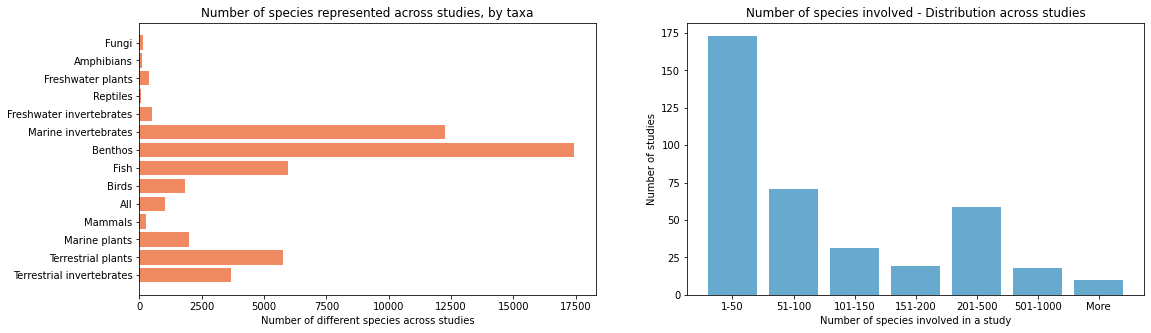

In [11]:
# let's plot both the # of species represented in the dataset, divided by taxa, and the distribution of the # of species per study
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

ax[0].barh(range(len(species_counts)), list(species_counts.values()), align='center', color='#ef8a62')
ax[0].set_yticks(range(len(species_counts)), list(species_counts.keys()))
ax[0].set_xlabel('Number of different species across studies')
ax[0].set_title(f'Number of species represented across studies, by taxa')

ax[1].bar(range(len(bin_counts)), list(bin_counts.values), align='center', color='#67a9cf')
ax[1].set_xticks(range(len(bin_counts)))
ax[1].set_xticklabels(bin_names)
ax[1].set_xlabel(f'Number of species involved in a study')
ax[1].set_ylabel('Number of studies')
ax[1].set_title(f'Number of species involved - Distribution across studies')

plt.show()

**Temporal span**

- There's a good mapping of the temporal aspect as well: the resolutions available in `allrawdata` are DAY, MONTH, YEAR. In `datasets`, we have START_YEAR and END_YEAR, as well as DATA_POINTS, which actually marks the "number of years covered" by a study. 

*Not to be confused with NUMBER_OF_SAMPLES = the number of unique samples in the study, nor with TOTAL = total number of records within the study*.

- Note that records might not be consistently present between the logged start and end year. Sometimes they are considerabily more sparse, while other times several records per year are available. In this version, **years span from 1874 to 2018**.
- I really like that in the `curation` table there is a DATE_STUDY_ADDED column, to record a study's addition to the database.
- Below, we query from `allrawdata` and `datasets` to create a table with years in the column, and visualize with a heatmap when data is actually present. 

In [12]:
# query from allrawdata and datasets the year for each study
conn = sqlite3.connect("data/biotime.db")
query = "SELECT allrawdata.STUDY_ID, allrawdata.YEAR, allrawdata.MONTH, datasets.DATA_POINTS, datasets.START_YEAR, datasets.END_YEAR from allrawdata inner join datasets on allrawdata.STUDY_ID=datasets.STUDY_ID;"
study_years = pd.read_sql_query(query, conn)
study_years.head(5)

STUDY_ID  YEAR  MONTH  DATA_POINTS  START_YEAR  END_YEAR
0       194  1994      8            6        1994      2004
1       194  2004      8            6        1994      2004
2       194  2004      8            6        1994      2004
3       194  2001      8            6        1994      2004
4       194  2001      9            6        1994      2004

In [13]:
# initialize a year-columns dataframe and fill it by going through studies
years_cols = list(map(str, range(study_years['YEAR'].min(), study_years['YEAR'].max()+1)))
years_df = pd.DataFrame(index=range(len(study_years['STUDY_ID'].unique())), columns=['STUDY_ID', 'DATA_POINTS'] + years_cols)
years_df['STUDY_ID'] = list(study_years['STUDY_ID'].unique())

for index, row in years_df.iterrows():
    s = row['STUDY_ID']
    s_data_points = study_years.loc[study_years['STUDY_ID'] == s]['DATA_POINTS'].unique()  # this should be a single one 
    assert len(s_data_points) == 1
    s_years = list(map(str, study_years.loc[study_years['STUDY_ID'] == s]['YEAR'].unique()))  # value_counts() could be interesting here!
    row_dict = {k: 1 if k in s_years else None for k in years_cols}
    row_dict['DATA_POINTS'] = int(s_data_points[0])
    row_dict['STUDY_ID'] = s
    years_df.loc[index] = pd.Series(row_dict)
    
# years_df.head()

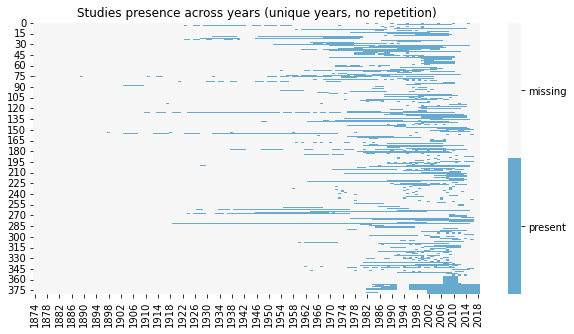

In [14]:
# year-by-year heatmap of studies
colors = ('#67a9cf', '#f7f7f7')  # light blue, light grey 
binary_cmap = LinearSegmentedColormap.from_list('binary', colors, len(colors))

fig = plt.figure(figsize=(10,5))
ax = sns.heatmap(years_df[years_cols].isna(), cmap=binary_cmap)

colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25,0.75])
colorbar.set_ticklabels(['present', 'missing'])
plt.title(f'Studies presence across years (unique years, no repetition)')
plt.show()

- At first glance, this looks more sparse than the time-series in the LPI database. If we check the distribution of time-series length, we see that it resembles that of the LPI database, although a caveat here is that the LPI data measures *population time-series*, while here we look at the study-level. Note that what we plot below is *not* study durations! **It would be cool to measure "temporal sparsity" in these datasets!**
- Plotting the DATE_STUDY_ADDED column can give us an overview of the database evolution through time.

In [15]:
# time-series length
# 11 bins are identified in https://www.livingplanetindex.org/stats, to which we add 0-1
bin_names = ['0-1', '2', '3-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', 'More']    
bins = pd.IntervalIndex.from_tuples(
    [(0, 1), (2, 2), (3, 5), (6, 10), (11, 15), (16, 20), (21, 25), (26, 30), (31, 35), (36, 40), (41, 45), (46, 100)], 
    closed='both')
lengths = []
for index, row in years_df.iterrows():  # this takes some time...
    lengths.append(row[years_cols].count())
bin_counts = pd.cut(lengths, bins).value_counts()

In [16]:
# prep the DATE_STUDY_ADDED column
date_added = dfs['curation'][['DATE_STUDY_ADDED']].copy()
date_added['count'] = 1
date_added['date'] = pd.to_datetime(date_added['DATE_STUDY_ADDED'].apply(lambda x: datetime.datetime.strptime(x, '%b-%y')))
date_added.set_index('date', inplace=True)
# date_added.head(3)

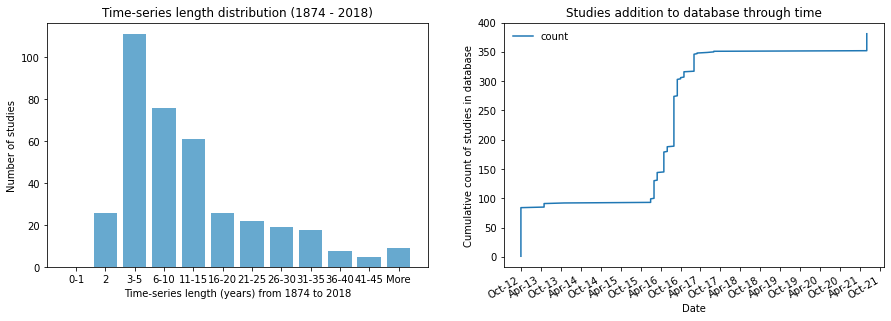

In [17]:
# let's plot both time-series length and temporal distribution of the abundance data
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].bar(range(len(bin_counts)), list(bin_counts.values), align='center', color='#67a9cf')
ax[0].set_xticks(range(len(bin_counts)))
ax[0].set_xticklabels(bin_names)
ax[0].set_xlabel(f'Time-series length (years) from 1874 to 2018')
ax[0].set_ylabel('Number of studies')
ax[0].set_title(f'Time-series length distribution (1874 - 2018)')

date_added.sort_index().cumsum().plot(ax=ax[1])
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Cumulative count of studies in database')
ax[1].legend(frameon=False)
ax[1].set_title(f'Studies addition to database through time')

plt.show()

### 7. Does this data need cleaning?

- Given the solidity of the contribution procedure, I think the database is as clean as it can be in recording informations from studies. 
- Of course, targeted cleaning steps might be required to answer particular questions. More than cleaning, I would recommend to double check that fields are what we actually expect them to be (e.g., `datasets.DATA_POINTS` record the number of _years_ and not of samples) and the correspondence between IDs and similar columns (e.g., count of unique `allrawdata.ID_SPECIES` corresponds to `datasets.NUMBER_OF_SPECIES`, but not always to `allrawdata.SPECIES`).

## <font color='grey' style='font-family:Georgia'>Measure and visualize</font>

### 8. What are some questions that this data can help answer?

Let's see whether this database is better equipped to answer questions of data origins and conservation bias better than the LPI one. 

There are several fields available reporting on the source of the data and the study behing it:
- Both `datasets` and `contacts` tables are in 1:1 correspondence with the 381 studies. From these tables we can gather information about TITLE of the study and DATA_SOURCE (with a specified WEB_LINK).
- Instead, `citation1` contains 611 records: there can be more than one record (i.e., publication) for each study. The TITLE field in `datasets` is _not_ a publication title, but a title to the overall study. 

_This is a bit weird, but `citation1` has 382 unique STUDY_ID, instead of the usual 381._

In [18]:
# query from datasets and contacts the title and source for each study
conn = sqlite3.connect("data/biotime.db")
query = "SELECT datasets.STUDY_ID, datasets.TITLE, contacts.DATA_SOURCE, contacts.WEB_LINK from datasets inner join contacts on datasets.STUDY_ID=contacts.STUDY_ID;"

title_source = pd.read_sql_query(query, conn)
title_source.head(5)

STUDY_ID                                              TITLE  \
0        10  Windstorm disturbance without patch dynamics t...   
1        18  Mapped quadrats in sagebrush steppe long-term ...   
2        33  Long-term phytoplankton community dynamics in ...   
3        39  Bird community dynamics in a temperate deciduo...   
4        41        Time and space and the variation of species   

       DATA_SOURCE                                           WEB_LINK  
0          Ecology  http://esapubs.org/archive/ecol/E082/011/defau...  
1          Ecology  http://esapubs.org/archive/ecol/E091/243/defau...  
2  Oxford Journals  http://plankt.oxfordjournals.org/content/32/5.toc  
3          Ecology           http://www.esajournals.org/toc/emon/56/3  
4          Ecology           http://www.esajournals.org/toc/ecol/41/4

There are 110 different DATA_SOURCE values: 
- The most frequently used source is OBIS ([Ocean Biodiversity Information System](https://obis.org/)). 
- For other sources appearing more than 10 times, we see a mix of databanks/databases and fields like "Contacted author directly", "Data contributed by authors". 
- The NA values are actually not None: all records refer to studies of Grasshoppers in the [Konza Prairie](http://lter.konza.ksu.edu/). _Maybe NA is an acronym for some other database?_

In [19]:
source_value_counts = title_source['DATA_SOURCE'].value_counts()
print(f'There are {len(source_value_counts)} different data sources. Those appearing 10 or more times are:')
source_value_counts[source_value_counts >= 10]

There are 110 different data sources. Those appearing 10 or more times are:


OBIS                                                70
Contacted author directly                           32
ITEX database                                       22
Natural Forests in the Czech Republic (Databank)    19
Data contributed by authors                         16
NA                                                  14
Ministry of the Environment Biodiversity Center     14
ESA - Ecological Publications (Ecology)             10
Name: DATA_SOURCE, dtype: int64

In [20]:
# title_source.loc[title_source['DATA_SOURCE']=='NA']

**Let's look at a potential conservation bias**, i.e., the fact that because the studies compiled in the dataset have as their focus species that are targeted for conservation (or are carried out in conservation areas) there might be a skewed representation of abundance of the populations.

I did not mentioned it up to now, but the record of "abundance" data is logged in `allrawdata`. The database provides options to record ABUNDANCE and/or BIOMASS data. Dedicated tables further describe the type of abundance/biomass measurement and type. 

**Note:** One of the listed abundance type is actually "Occurrence"... wasn't this supposed to denote a very different type of measurement?

In [21]:
# dfs['abundance']
# dfs['datasets'].loc[dfs['datasets']['AB_TYPE'] == 5]

In `site`, PROTECTED_AREA is always False, so nothing to explore there!

In [22]:
dfs['site']['PROTECTED_AREA'].value_counts()

FALSE    292
TRUE      89
Name: PROTECTED_AREA, dtype: int64

In [23]:
# TODO
# habitat selection and computation of alpha-diversity?
# http://biodiv.smultron.org/dataset/gbif/computing-%ce%b1-diversity/
# biome_map?

# compare LPI and BioTIME to assess overlaps and complementarity, e.g., in terms of locations and species 
# is there a way we can use the iucn redlist as well?
# 1. check proportion of records falling into redlist polygons
# 2. check overlaps with species in the redlist